In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv(r"D:\MachineLearning\A-Z Machine Learning\Polynomial Regression\Position_Salaries.csv")

In [6]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [23]:
x = data.iloc[:, 1].values
x = x.reshape(-1, 1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
y = data.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
lm1 = LinearRegression()

In [25]:
lm1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
x.shape

(10, 1)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_feature = PolynomialFeatures(degree=3)

In [42]:
x_poly = poly_feature.fit_transform(x)

In [43]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [44]:
poly_feature.fit(x_poly, y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [45]:
lm2 = LinearRegression()

In [46]:
lm2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lm1.predict([[6.5]])

array([330378.78787879])

In [48]:
lm2.predict(poly_feature.fit_transform([[6.5]]))

array([133259.46969697])

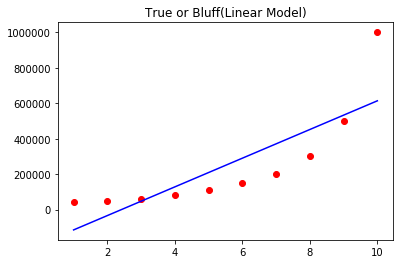

In [49]:
plt.title("True or Bluff(Linear Model)")
plt.scatter(x, y, color= 'red')
plt.plot(x, lm1.predict(x), color= 'blue')
plt.show()

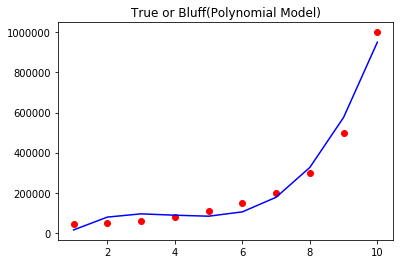

In [50]:
plt.title("True or Bluff(Polynomial Model)")
plt.scatter(x, y, color= 'red')
plt.plot(x, lm2.predict(poly_feature.fit_transform(x)), color='blue')
plt.show()